# Hoodies Trends

Given the two datasets from orders in 2015 and 2016, create answers the question:

*Did the company sell more Hoodies in 2016 than in 2015 in the first 25 days of December?*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'/Users/daniela/Documents/Conundrum2'

In [3]:
orders_2015 = pd.read_csv('../Conundrum2/data/orders_2015.csv')
orders_2016 = pd.read_csv('../Conundrum2/data/orders_2016.csv')

In [4]:
orders = pd.concat([orders_2015, orders_2016])

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 0 to 9227
Data columns (total 10 columns):
order_date          16950 non-null object
order_date_year     16950 non-null int64
order_date_month    16950 non-null int64
order_date_day      16950 non-null int64
pages_visited       16950 non-null int64
order_id            16950 non-null object
customer_id         16950 non-null object
tshirt_category     16950 non-null object
tshirt_price        16950 non-null float64
tshirt_quantity     16950 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.4+ MB


Checking duplicates:

In [6]:
orders.drop_duplicates(inplace=True)

### 1. Number of Orders 2015-2016

In [18]:
orders.groupby(['order_date_year', 'order_date_month']).count().tshirt_quantity

order_date_year  order_date_month
2015             1                   443
                 2                   352
                 3                   448
                 4                   419
                 5                   458
                 6                   563
                 7                   681
                 8                   800
                 9                   909
                 10                  921
                 11                  874
                 12                  854
2016             1                   673
                 2                   616
                 3                   659
                 4                   673
                 5                   677
                 6                   764
                 7                   779
                 8                   869
                 9                   863
                 10                  911
                 11                  838
                 12    

In [7]:
ordersByMonth = orders.groupby(['order_date_year', 'order_date_month']).count().tshirt_quantity.reset_index()
ordersByMonth

,order_date_year,order_date_month,tshirt_quantity
0,2015,1,443
1,2015,2,352
2,2015,3,448
3,2015,4,419
4,2015,5,458
5,2015,6,563
6,2015,7,681
7,2015,8,800
8,2015,9,909
9,2015,10,921


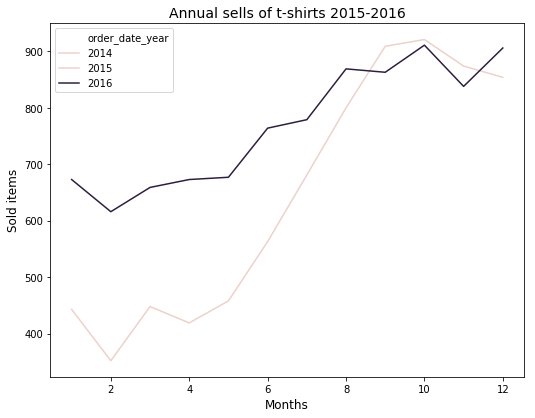

In [14]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', y='tshirt_quantity', hue='order_date_year', data=ordersByMonth)
_ = plt.title('Annual orders of t-shirts 2015-2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Orders', size=12)

### 2. Sold items during 2015-2016

In [21]:
orders.groupby(['order_date_year', 'order_date_month']).tshirt_quantity.sum()

order_date_year  order_date_month
2015             1                   1399
                 2                   1095
                 3                   1205
                 4                   1008
                 5                   1214
                 6                   1278
                 7                   1621
                 8                   2041
                 9                   2328
                 10                  2436
                 11                  2463
                 12                  2552
2016             1                   2116
                 2                   1758
                 3                   1918
                 4                   1774
                 5                   1746
                 6                   1891
                 7                   1946
                 8                   2184
                 9                   2218
                 10                  2564
                 11                  2408


In [23]:
soldItemsByMonth = orders.groupby(['order_date_year', 'order_date_month']).tshirt_quantity.sum().reset_index()
soldItemsByMonth

,order_date_year,order_date_month,tshirt_quantity
0,2015,1,1399
1,2015,2,1095
2,2015,3,1205
3,2015,4,1008
4,2015,5,1214
5,2015,6,1278
6,2015,7,1621
7,2015,8,2041
8,2015,9,2328
9,2015,10,2436


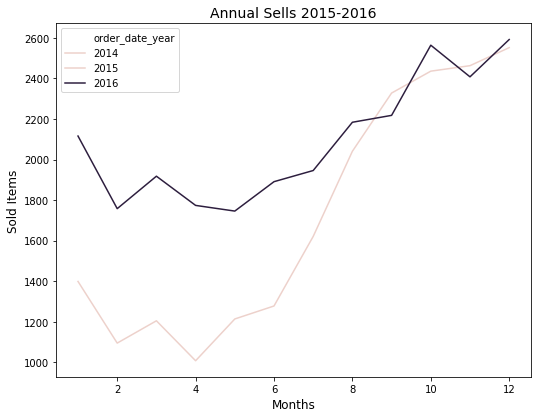

In [24]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', y='tshirt_quantity', hue='order_date_year', data=soldItemsByMonth)
_ = plt.title('Annual Sells 2015-2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

### 3. Type of T-shirts

In [40]:
orders.tshirt_category.unique()

array(['White T-Shirt M', 'Hoodie', 'Black T-Shirt F', 'Black T-Shirt M',
       'White T-Shirt F', 'Tennis Shirt'], dtype=object)

Joining white and black T-Shirts for male/female:

In [50]:
def join_genres(tshirt_category):
    if tshirt_category.startswith('Black T-Shirt'):
        tshirt_class = 'Black T-Shirt'
    elif tshirt_category.startswith('White T-Shirt'):
        tshirt_class = 'White T-Shirt'
    else:
        tshirt_class = tshirt_category
    return tshirt_class

In [51]:
orders['tshirt_class'] = orders.tshirt_category.apply(join_genres)

In [52]:
orders.groupby(['order_date_year', 'order_date_month', 'tshirt_class']).tshirt_quantity.sum()

order_date_year  order_date_month  tshirt_class 
2015             1                 Black T-Shirt    433
                                   Hoodie           364
                                   Tennis Shirt     130
                                   White T-Shirt    472
                 2                 Black T-Shirt    280
                                   Hoodie           214
                                   Tennis Shirt     139
                                   White T-Shirt    462
                 3                 Black T-Shirt    321
                                   Hoodie           406
                                   Tennis Shirt      74
                                   White T-Shirt    404
                 4                 Black T-Shirt    292
                                   Hoodie           244
                                   Tennis Shirt      71
                                   White T-Shirt    401
                 5                 Black T-Shirt    291

In [53]:
typeTshirtsByMonth = orders.groupby(['order_date_year', 'order_date_month', 'tshirt_class']).tshirt_quantity.sum().reset_index()
typeTshirtsByMonth.head(15)

,order_date_year,order_date_month,tshirt_class,tshirt_quantity
0,2015,1,Black T-Shirt,433
1,2015,1,Hoodie,364
2,2015,1,Tennis Shirt,130
3,2015,1,White T-Shirt,472
4,2015,2,Black T-Shirt,280
5,2015,2,Hoodie,214
6,2015,2,Tennis Shirt,139
7,2015,2,White T-Shirt,462
8,2015,3,Black T-Shirt,321
9,2015,3,Hoodie,406


In [55]:
typeTshirtsByMonth2015 = typeTshirtsByMonth[typeTshirtsByMonth.order_date_year == 2015]
typeTshirtsByMonth2016 = typeTshirtsByMonth[typeTshirtsByMonth.order_date_year == 2016]

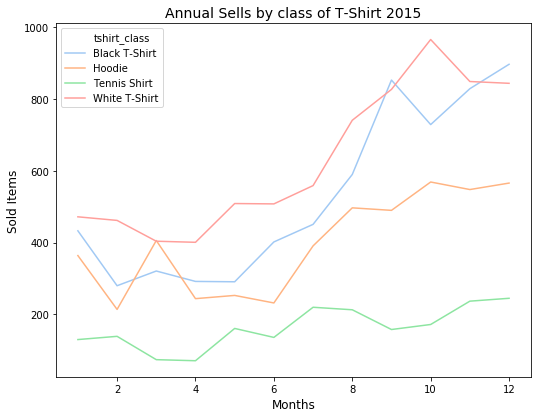

In [60]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='tshirt_class', 
                 data=typeTshirtsByMonth2015,
                 palette='pastel')
_ = plt.title('Annual Sells by class of T-Shirt 2015', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

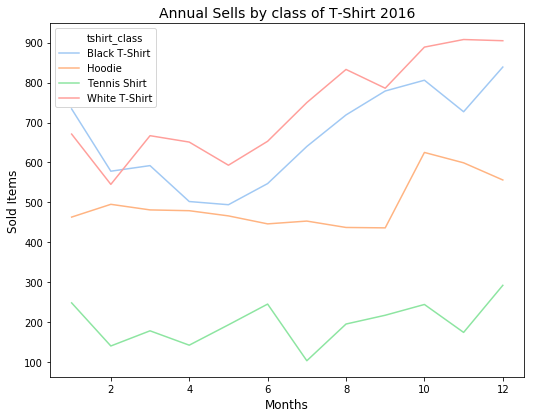

In [61]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='tshirt_class', 
                 data=typeTshirtsByMonth2016,
                 palette='pastel')
_ = plt.title('Annual Sells by class of T-Shirt 2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

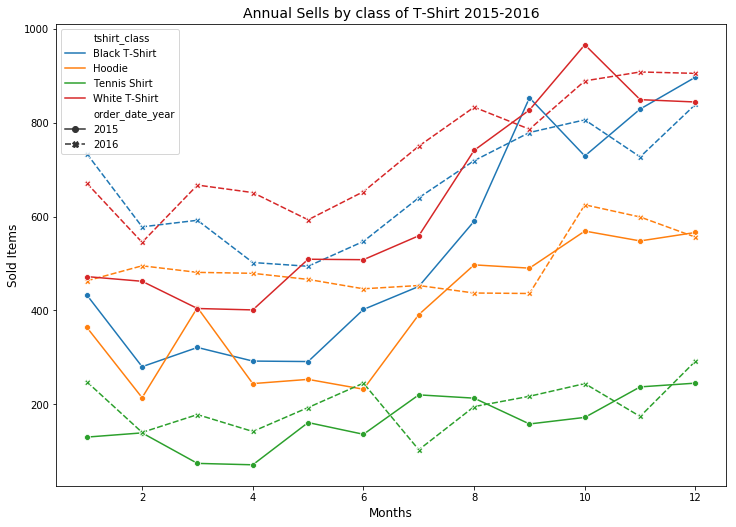

In [74]:
_ = plt.figure(figsize=(12, 8.5))
_ = sns.lineplot(x='order_date_month', y='tshirt_quantity', hue='tshirt_class', style='order_date_year', 
            data=typeTshirtsByMonth, dashes=True, markers=True)
_ = plt.title('Annual Sells by class of T-Shirt 2015-2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

Did the company sell more Hoodies in 2016 than in 2015 in the first 25 days of December?

In [77]:
hoodie = orders[(orders.tshirt_category == 'Hoodie') & (orders.order_date_month == 12)]

In [82]:
hoodieDecember = hoodie.groupby(['order_date_year', 'order_date_day']).tshirt_quantity.sum().reset_index()

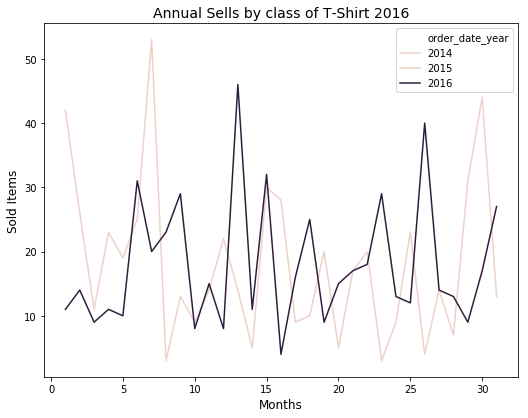

In [84]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_day', 
                 y='tshirt_quantity', 
                 hue='order_date_year', 
                 data=hoodieDecember)
_ = plt.title('Annual Sells by class of T-Shirt 2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

In [ ]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_day', 
                 y='tshirt_quantity', 
                 hue='order_date_year', 
                 data=hoodieDecember)
_ = plt.title('Annual Sells by class of T-Shirt 2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

In [ ]:
Data columns (total 10 columns):
order_date          16950 non-null object
order_date_year     16950 non-null int64
order_date_month    16950 non-null int64
order_date_day      16950 non-null int64
pages_visited       16950 non-null int64
order_id            16950 non-null object
customer_id         16950 non-null object
tshirt_category     16950 non-null object
tshirt_price        16950 non-null float64
tshirt_quantity     16950 non-null int64
dtypes: float64(1), int64(5), object(4

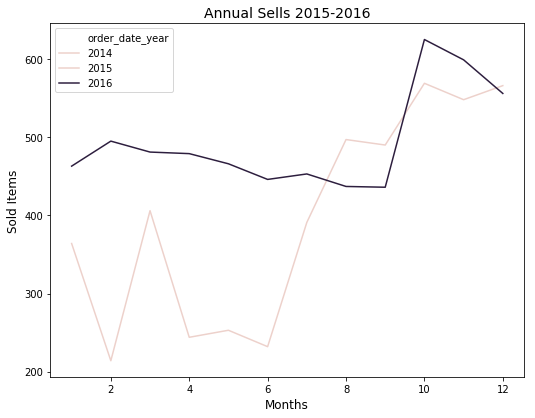

In [47]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='order_date_year', 
                 data=hoodie)
_ = plt.title('Annual Sells 2015-2016', size=14)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)